# Lab 6 - Data Visualization with Seaborn

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [130]:
df = pd.read_csv("nfloffenseweek3.csv")
nfl = pd.read_csv("nfl_teams.csv")
df.head()
nfl.head()

,ID,team,Abbreviation,Conference,Division
0,1,Arizona Cardinals,ARI,NFC,West
1,2,Atlanta Falcons,ATL,NFC,South
2,3,Baltimore Ravens,BAL,AFC,North
3,4,Buffalo Bills,BUF,AFC,East
4,5,Carolina Panthers,CAR,NFC,South


In [131]:
week_3 = pd.read_csv("nfloffenseweek3.csv")
week_4 = pd.read_csv("nfloffenseweek4.csv")
week_5 = pd.read_csv("nfloffenseweek5.csv")
week_6 = pd.read_csv("nfloffenseweek6.csv")
week_7 = pd.read_csv("nfloffenseweek7.csv")

In [164]:
week_3["week"] = 3
week_4["week"] = 4
week_5["week"] = 5
week_6["week"] = 6
week_7["week"] = 7

In [165]:
weeks = pd.concat( [week_3, week_4, week_5, week_6, week_7] )

In [134]:
nfl.drop("ID", axis=1, inplace=True)
nfl.head()

,team,Abbreviation,Conference,Division
0,Arizona Cardinals,ARI,NFC,West
1,Atlanta Falcons,ATL,NFC,South
2,Baltimore Ravens,BAL,AFC,North
3,Buffalo Bills,BUF,AFC,East
4,Carolina Panthers,CAR,NFC,South


In [167]:
df = pd.merge(weeks, nfl, on="team")
df.head()

,week,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,passes_completed,passes_attempted,passing_yards,passing_touchdowns,passing_interceptions,net_yards_per_pass_attempt,passing_1st_downs,rushing_attempts,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,Abbreviation,Conference,Division
0,3,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,56,88,735,10,2,7.8,32,72,406,2,5.6,18,8,44,5,42.9,8.6,35.63,BAL,AFC,North
1,4,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,76,117,869,11,4,7.0,39,105,568,3,5.4,31,17,114,7,42.2,11.1,32.97,BAL,AFC,North
2,5,4,Baltimore Ravens,5,138,1762,291,6.1,6,1,99,95,149,1039,12,5,6.6,46,133,723,3,5.4,44,23,162,9,43.6,10.9,36.86,BAL,AFC,North
3,6,4,Baltimore Ravens,6,158,2168,349,6.2,8,2,122,112,181,1234,13,6,6.4,59,157,934,4,5.9,54,33,236,9,43.8,12.5,42.86,BAL,AFC,North
4,7,3,Baltimore Ravens,7,181,2422,412,5.9,9,3,139,121,197,1328,13,6,6.3,64,201,1094,6,5.4,65,36,289,10,44.6,12.2,44.44,BAL,AFC,North


In [168]:
colors = pd.read_csv("teams_colors_logos.csv")
colors.head()

,team_abbr,team,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

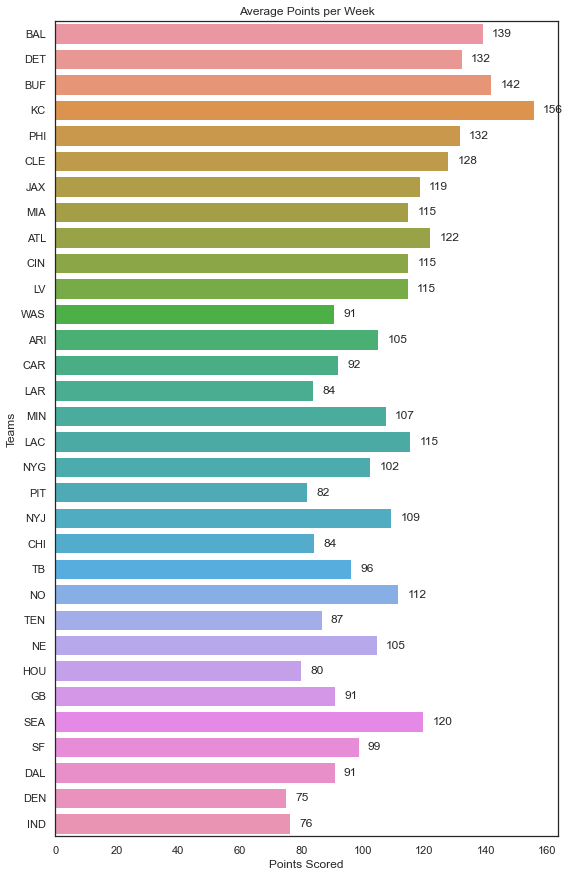

In [186]:
weeks = df.groupby(df.week).mean()
f, ax = plt.subplots(figsize=(9, 15))
sns.barplot(x='points_scored', y='Abbreviation', data=df, orient='h', ci=None);
plt.xlabel("Points Scored")
plt.ylabel('Teams')
plt.title('Average Points per Week')
# label each bar in barplot
for p in ax.patches:
 height = p.get_height() # height of each horizontal bar is the same
 width = p.get_width() # width (average number of passengers)
 # adding text to each bar
 ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
 y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
 s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
 va = 'center') # sets vertical alignment (va) to center

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

Text(0.5, 1.0, 'Average Passing and Rushing Yards')

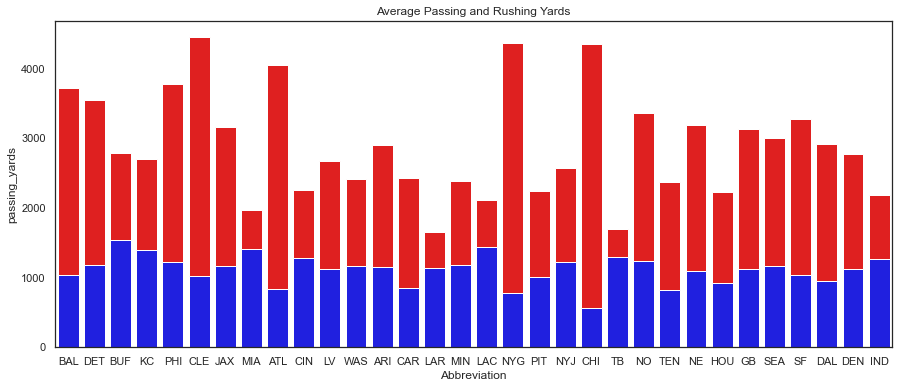

In [183]:
plt.figure(figsize=(15, 6))

sns.barplot( data = df, x = df.Abbreviation, y = df.rushing_yards, estimator = np.sum, ci=None, color = 'red');
sns.barplot( data = df, x = df.Abbreviation, y = df.passing_yards, ci=None, color = 'blue');

top = mp.Patch(color='red', label='Rushing Yards')
bottom = mp.Patch(color='blue', label='Passing Yards')
plt.title("Average Passing and Rushing Yards")
# sns.barplot(x='Abbreviation', y='total_yards', data=df.passing_yards)
# sns.barplot(x='Abbreviation', y='total_yards', data=df.rushing_yards, bottom=(df.passing_yards))


4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

In [171]:
df.rename( columns={'1st_downs': 'first_downs'}, inplace=True )
df.columns

Index(['week', 'rank', 'team', 'games', 'points_scored', 'total_yards',
       'offensive_plays', 'yards_per_play', 'turnovers_lost', 'fumbles_lost',
       'first_downs', 'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_1st_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_1st_downs', 'penalties', 'penalty_yards', '1st_down_penalties',
       'percentage_scoring_drives', 'percentage_turnover_drives',
       'expected_points', 'Abbreviation', 'Conference', 'Division'],
      dtype='object')

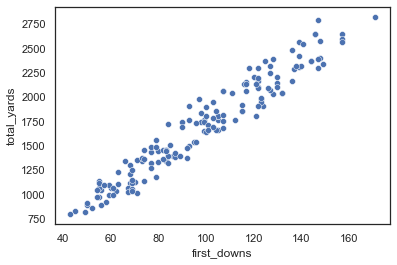

In [187]:
sns.scatterplot(x=df.first_downs, y=df.total_yards);

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

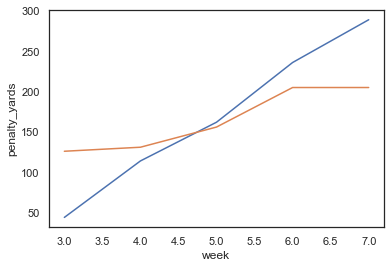

In [173]:
ravens = df[ df.team == "Baltimore Ravens" ]
rams = df[ df.team == "Los Angeles Rams" ]
sns.lineplot(x= df.week, y= ravens.penalty_yards);
sns.lineplot(x= df.week, y= rams.penalty_yards);

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

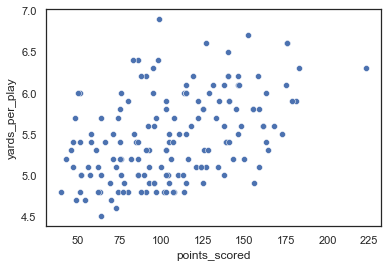

In [174]:
sns.scatterplot(x=df.points_scored, y=df.yards_per_play);

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

Text(0.5, 1.0, 'Penalty Yards for the NFC WEST')

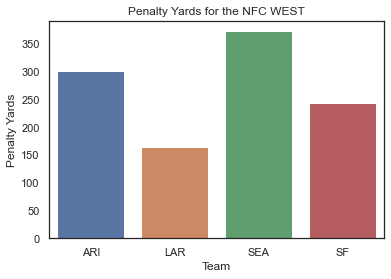

In [175]:
nfc_west = df[ (df.Conference == "NFC") & (df.Division == "West")]
sns.barplot(x='Abbreviation', y='penalty_yards', data=nfc_west, ci=None);
plt.xlabel("Team")
plt.ylabel("Penalty Yards")
plt.title("Penalty Yards for the NFC WEST")


8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

<AxesSubplot:xlabel='points_scored'>

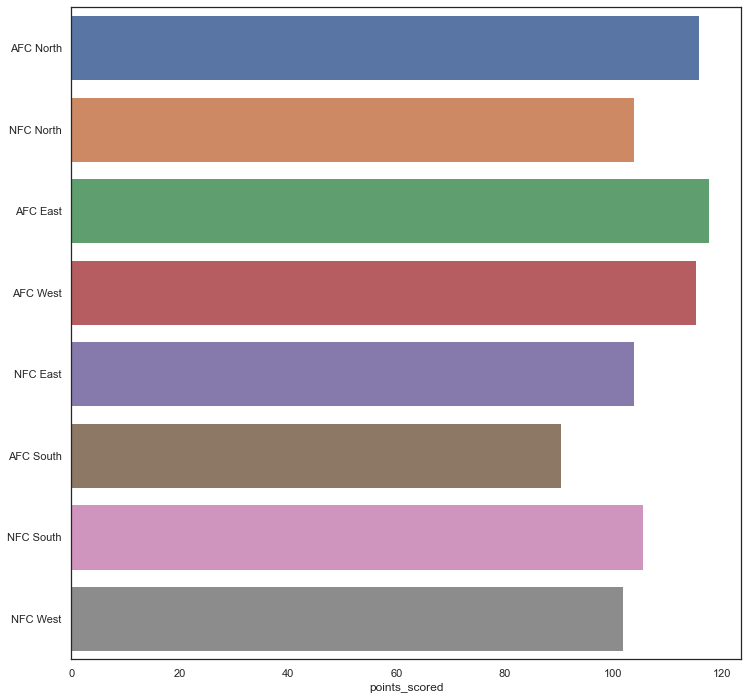

In [176]:
condiv = [' '.join(i) for i in zip(df["Conference"].map(str),df["Division"])]
f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(
    x = df.points_scored,
    y = condiv,
    ci=None
)